In [6]:
%pip install scikit-learn


     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     --------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
     --------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
     --------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
     --------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
     --------------------------------------- 0.0/11.0 MB 140.3 kB/s eta 0:01:18
     --------------------------------------- 0.1/11.0 MB 181.6 kB/s eta 0:01:01
     --------------------------------------- 0.1/11.0 MB 187.3 kB/s eta 0:00:59
     --------------------------------------- 0.1/11.0 MB 187.3 kB/s eta 0:00:59
     --------------------------------------- 0.1/11.0 MB 187.0 kB/s eta 0:00:59
     --------------------------------------- 0.1/11.0 MB 187.0 kB/s eta 0:00:59
     --------------------------------------- 0.1/11.0 MB


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\Retheck\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Attempting to load image from: C:/Users/Retheck/Desktop/Football_analysis/output_videos/cropped_image.jpg


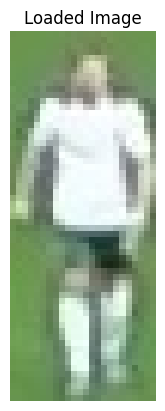

In [10]:
import cv2
import os

# Define the path to the cropped image
image_path = "C:/Users/Retheck/Desktop/Football_analysis/output_videos/cropped_image.jpg"

# Print the path to verify it's correct
print(f"Attempting to load image from: {image_path}")

# Check if the file exists
if not os.path.isfile(image_path):
    print(f"File does not exist: {image_path}")
else:
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is None:
        print("Failed to load image from the specified path.")
    else:
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display using Matplotlib
        import matplotlib.pyplot as plt
        plt.imshow(image)
        plt.title('Loaded Image')
        plt.axis('off')  # Hide axes
        plt.show()


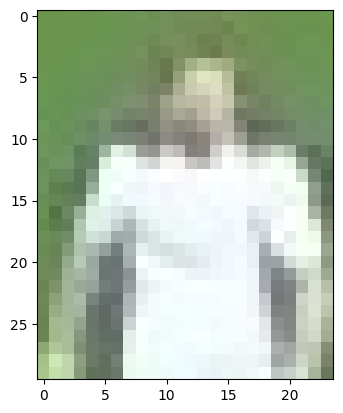

In [11]:
# take the top half of the image 
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

In [1]:
#cluster the image into two clusters                

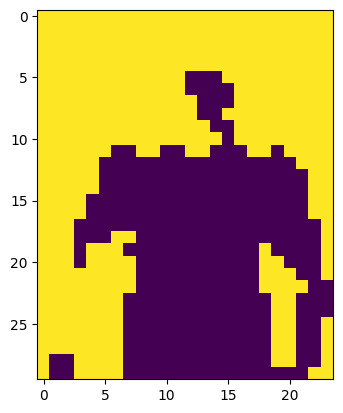

In [23]:
# Reshape the top_half_image into a 2D array (pixels x 3 color channels)
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original shape of top_half_image
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)

plt.show()


In [24]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [19]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [25]:
kmeans.cluster_centers_[player_cluster]

array([230.33006536, 238.32026144, 234.77777778])